In [1]:
# Library
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import scipy.stats
from sklearn.metrics import mean_squared_error
from math import sqrt
import os
from os import listdir
from datetime import datetime
import pandas as pd
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression

In [5]:
def aeronet_plot (path, date_format,nrows,ncols,colors,plot):
    '''
    The function allows plotting the daily averages of each AERONET station.
    The data of each station of interest is contained in a folder in .csv format previously processed.
    This function goes through the folder and takes each of these files to later make the plot of interest.
    Variables:
    - path : path to the folder where the files in .csv format are located
    - date_format: format of the date column of the file of interest. 
    For example: date_format='%Y-%m-%d %H:%M:%S'
    - nrows: number of rows the plot will have
    - ncols: number of columnas the plot will have
    - color palette for each of AERONET's stations For example: 
    colors = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d"])
    '''
    i=0 
    j=0 

    fig, ax = plt.subplots(ncols=ncols,nrows=nrows,  figsize=(12,6),dpi=400)
    #The folder where the files of each station are located is browsed.
    for p,files in enumerate(os.listdir(path)):
        N = len(os.listdir(path))
        data = pd.read_csv(os.path.join(path,files))
        #A column is created with the date called "Timestamp".
        data["Timestamp"] = data["date"].apply(lambda x: datetime.strptime(x,date_format))
        #Becomes the index column
        data.set_index('Timestamp', inplace = True)
        # Daily mean
        data_mean  = data['aod_550'].resample('1D').mean()
        data_mean_period = data_mean ['2015-01-01':'2024-12-31']
        data_mean_period_len =len(data_mean_period.dropna(how='all'))
        # Station Name
        station_name = files [2:4]
          
        mean = data_mean_period.mean()
      
       
        ########################                PLOT                ########################
        # Figure
        ax[i][j].plot(data_mean_period.index, data_mean_period,c=colors[p])
        ax[i][j].text(data_mean_period.index[1],2.4, "Media: " +" "+ str(round(data_mean_period.mean(),2)),  
            ha="left", va="center",fontdict={'family': 'serif', 
            'color' : 'Black',
            'size': 12})
#         print("Cuantas veces mas grande es el maximo que la media ",round(data_mean_period.max()/(data_mean_period.mean()),2))
        # Daily average line
        ax[i][j].axhline(y=mean, color= "black",linewidth=1.5, alpha=0.6, linestyle = '-')
        
        # Daily lenth text
        ax[i][j].text(data_mean_period.index[1],2.10, "sd: " +" "+ str(round(data_mean_period.std(),2)), 
            ha="left", va="center",fontdict={'family': 'serif', 
            'color' : 'Black',
            #'weight': 'bold',
            'size': 12})
#         ax[i][j].text(data_mean_period.index[1],2.0, "n =" +" "+ str(data_mean_period_len),  
#             ha="left", va="center",fontdict={'family': 'serif', 
#             'color' : 'Black',
#             'size': 10})
      
        # Axes names
        #ax[i][j].set_xlabel(r'$AOD_{Date}$',size=10)
#         ax[i][j].set_xlabel(r'Date',size=14)
#         ax[i][j].set_ylabel(r'$AOD_{AERONET}$',size=14)
        
        ax[0][0].set_xlabel(r'',size=10)
        ax[0][1].set_xlabel(r'',size=10)
        ax[0][2].set_xlabel(r'',size=10)
        ax[1][0].set_xlabel(r'Fecha',size=13)
        ax[1][1].set_xlabel(r'Fecha',size=13)
        ax[1][2].set_xlabel(r'Fecha',size=13)
        
        
        ax[0][0].set_ylabel(r'$AOD_{AERONET}$',size=14)
        ax[0][1].set_ylabel(r'',size=18)
        ax[0][2].set_ylabel(r'',size=18)
        ax[1][0].set_ylabel(r'$AOD_{AERONET}$',size=14)
        ax[1][1].set_ylabel(r'',size=18)
        ax[1][2].set_ylabel(r'',size=18)
        
        #Ticks
        ax[i][j].yaxis.set_ticks(np.arange(0.2, 2.65, 0.4))
        ax[i][j].set_ylim(0,2.6)
        
        # Title of each subplot corresponds to the name of the AERONET station.
        ax[i][j].set_title(station_name,fontsize=13,fontdict={'family': 'serif', 
            'color' : 'Black',
            'weight': 'bold',
            'size': 22})
        # Day fotmat
        Format = mdates.DateFormatter('%m-%y')
        ax[i][j].xaxis.set_major_formatter(Format)
        ax[i][j].xaxis.set_major_locator(ticker.AutoLocator())
        ax[i][j].xaxis.set_minor_locator(ticker.AutoMinorLocator())
       
        #ax[i][j].set_xlim('01-2015','12-2022')

        ax[i][j].set_xlim(pd.Timestamp('2014-10-01'), pd.Timestamp('2025-02-28'))

#         ax[2,1].set_visible(False)
        #ax[2,2].set_visible(False)
    
        #2015-2024
        faltate_datos = 3653-data_mean_period_len #2015-2024
        porc_faltante_datos = (faltate_datos/3653)*100


        # Imprimir el resultado en formato f-string
#         print(f"num_dias faltantes: {faltate_datos}")
#         print(f"% dias faltantes: {porc_faltante_datos:.2f}%")
#         # Location of data in each subplot
#         print(station_name)
    
        if j == ncols-1:
            i = i+1
            j = 0
        else:
            j = j+1
    ax[0][0].text(data_mean_period.index[1],1.8, "Datos faltantes: 20%",  
                    ha="left", va="center",fontdict={'family': 'serif', 
                    'color' : 'Black',
                    'size': 12})
    ax[0][1].text(data_mean_period.index[1],1.8, "Datos faltantes: 16%",  
                    ha="left", va="center",fontdict={'family': 'serif', 
                    'color' : 'Black',
                    'size': 12})
    ax[0][2].text(data_mean_period.index[1],1.8, "Datos faltantes: 11%",  
                    ha="left", va="center",fontdict={'family': 'serif', 
                    'color' : 'Black',
                    'size': 12})
    ax[1][0].text(data_mean_period.index[1],1.8, "Datos faltantes: 46%",  
                    ha="left", va="center",fontdict={'family': 'serif', 
                    'color' : 'Black',
                    'size': 12})
    ax[1][1].text(data_mean_period.index[1],1.8, "Datos faltantes: 9%",  
                    ha="left", va="center",fontdict={'family': 'serif', 
                    'color' : 'Black',
                    'size': 12})
    ax[1][2].text(data_mean_period.index[1],1.8, "Datos faltantes: 13%",  
                    ha="left", va="center",fontdict={'family': 'serif', 
                    'color' : 'Black',
                    'size': 12})
#     ax[0][1].text(data_mean_period.index[1],2.10, "        " , 
#     ha="left", va="center",fontdict={'family': 'serif', 
#     'color' : 'Black',
#     #'weight': 'bold',
#     'size': 12})
#     ax[0][1].text(data_mean_period.index[1],2.10, "           0 " , 
#     ha="left", va="center",fontdict={'family': 'serif', 
#     'color' : 'Black',
#     #'weight': 'bold',
#     'size': 12})
#     ax[1][0].text(data_mean_period.index[1],2.4, "                     0",  
#     ha="left", va="center",fontdict={'family': 'serif', 
#     'color' : 'Black',
#     'size': 12})
    plt.subplots_adjust(left=0.01,#0.125,
                    bottom=0.01,#0.1, 
                    right=0.99,#0.9, 
                    top=0.99,#0.9, 
                    wspace=0.2, 
                    hspace=0.25)#0.4)
   # Save the plot to the current path
    if plot == 'save':
        return(plt.savefig("aeronet_plot2.jpg", dpi=500))
    else:
        return(plt.show())


### Serie temporal AERONET
Serie temporal con datos diarios de AERONET con AOD interpolado a 550

### Latam

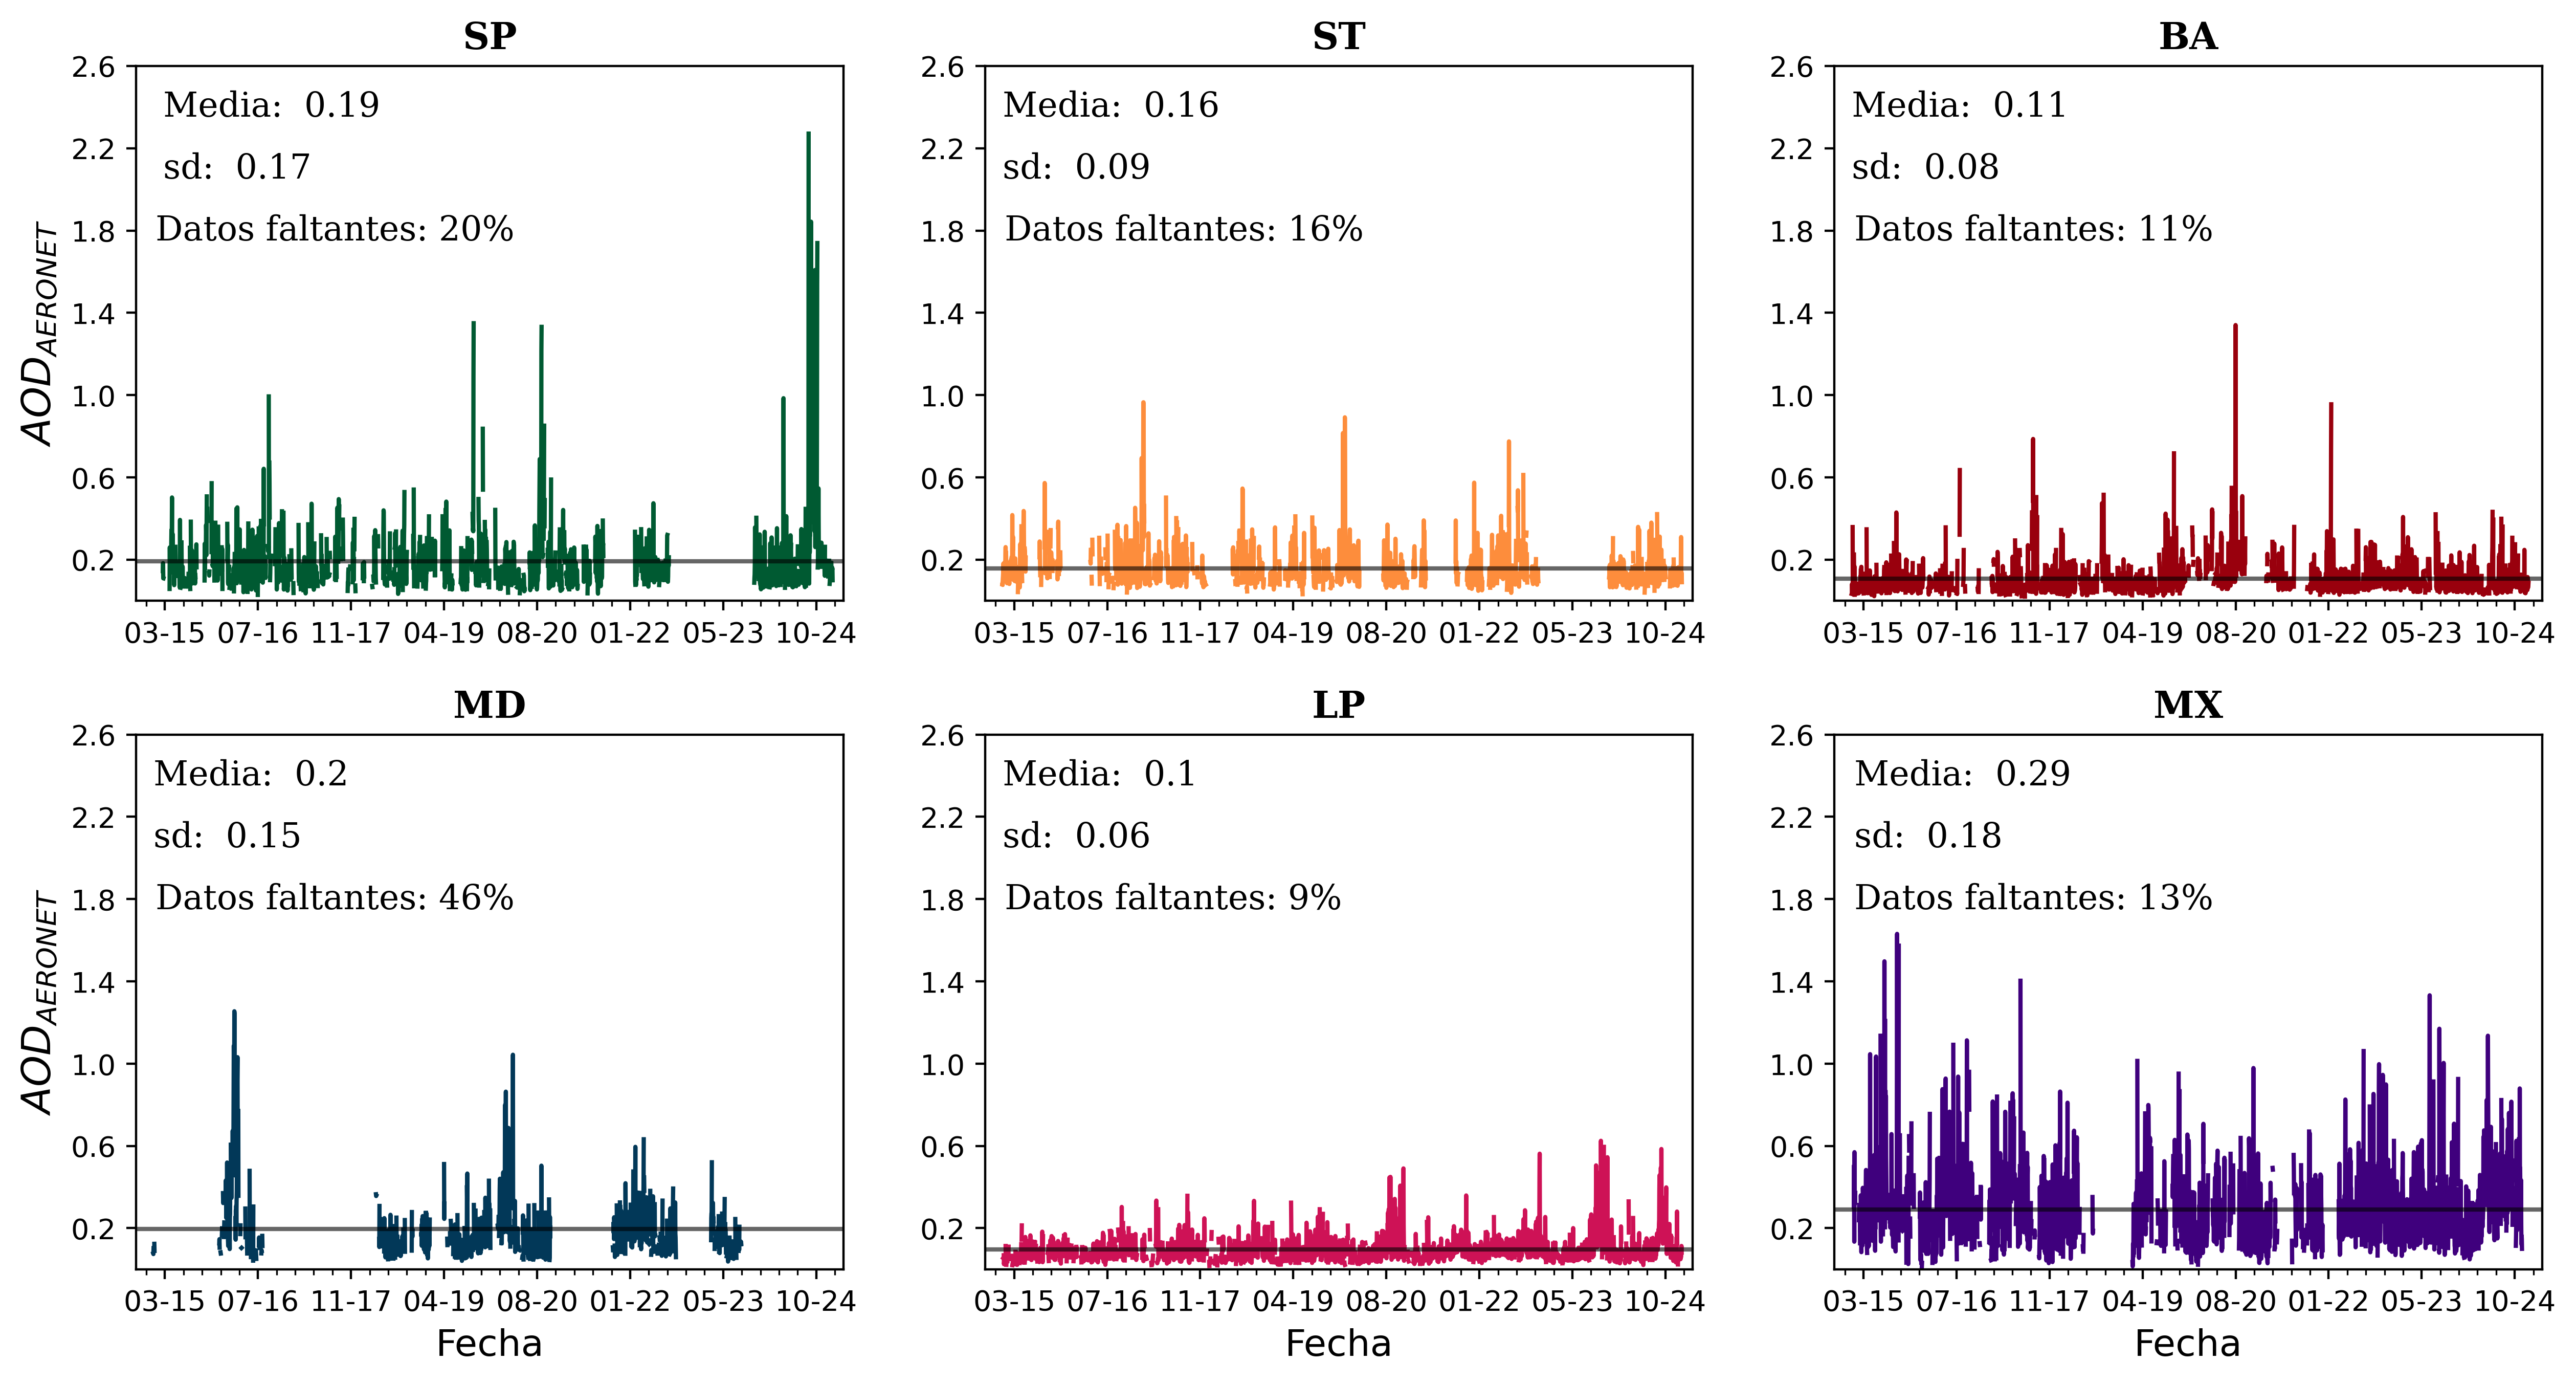

In [6]:
dir_path_latam = "D:/Josefina/paper_git/paper_maiac/datasets/V03/aeronet/datasets_interp_s_L02/Latam"
date_format_latam = '%d/%m/%Y %H:%M'#'%Y-%m-%d %H:%M:%S'
nrows=2
ncols=3
color = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d","#c994c7"]
plot= 'NO'
aeronet_plot_latam = aeronet_plot(path=dir_path_latam,date_format=date_format_latam,nrows=nrows,ncols=ncols,colors = color, plot=plot)
aeronet_plot_latam


### USA

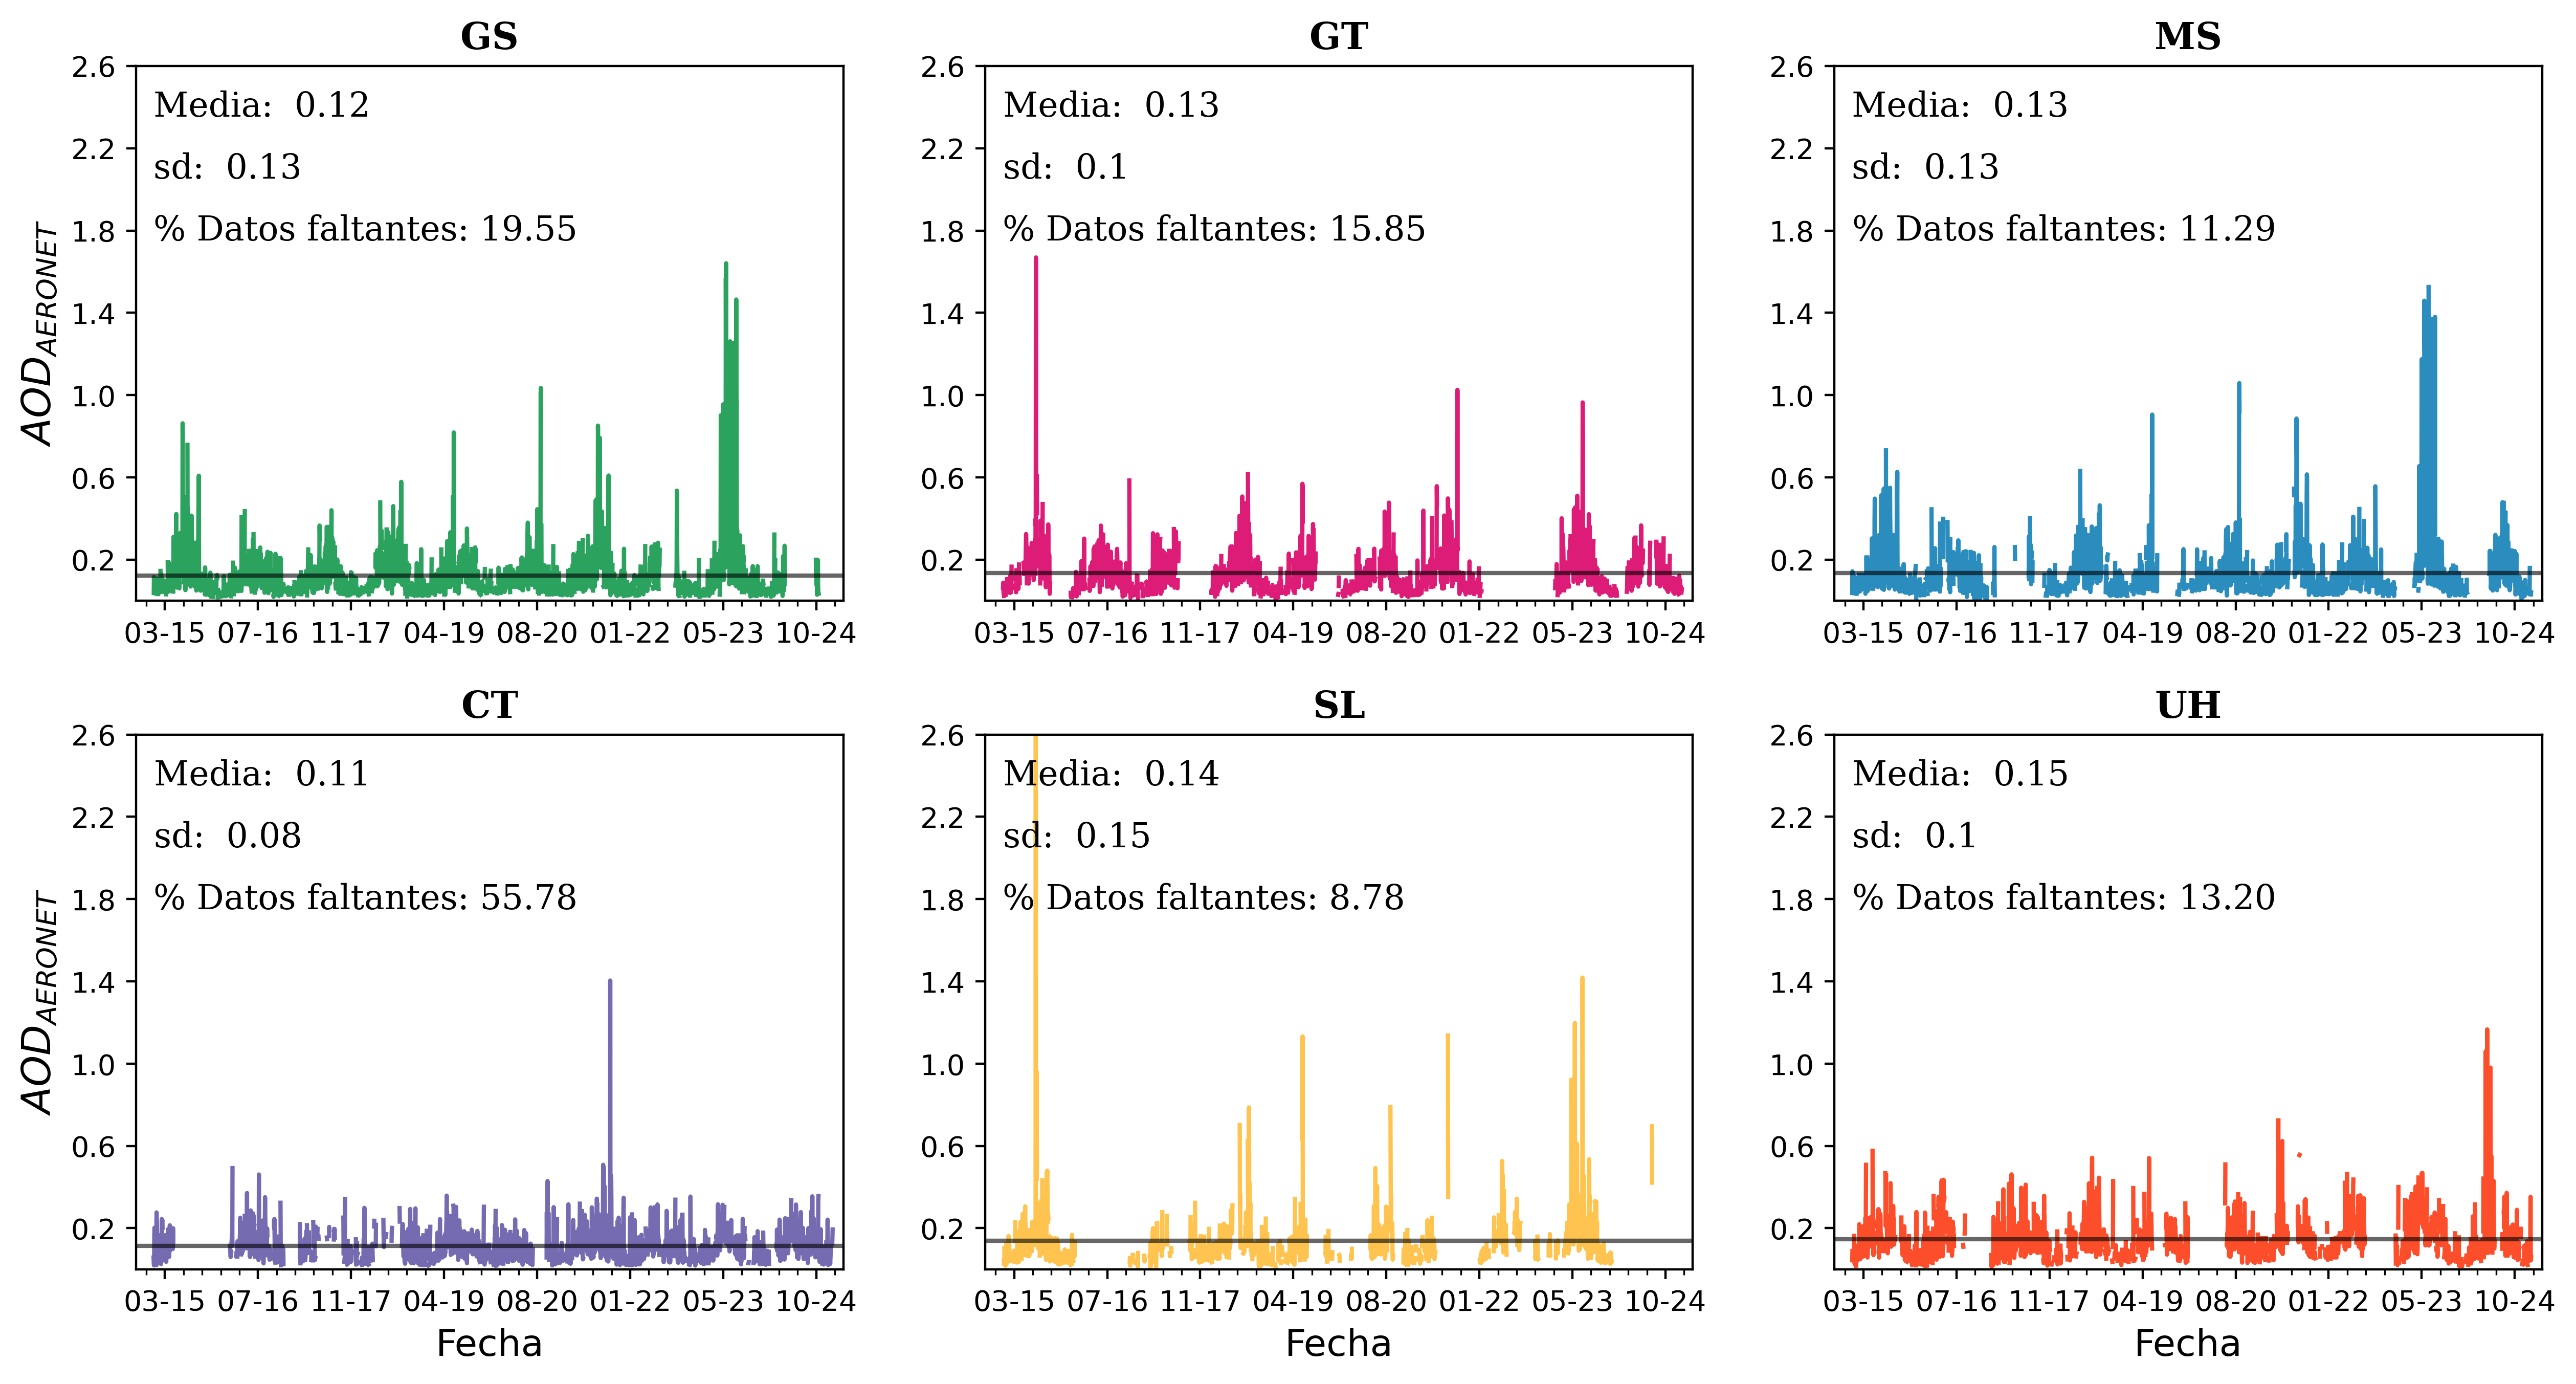

In [6]:
dir_path_usa = "D:/Josefina/paper_git/paper_maiac/datasets/V03/aeronet/datasets_interp_s_L02/USA"
date_format_usa = '%d/%m/%Y %H:%M'#'%Y-%m-%d %H:%M:%S'

nrows=2
ncols=3
color = ["#2ca25f","#dd1c77","#2b8cbe","#756bb1","#fec44f" ,"#fc4e2a"]
plot= 'NO'
aeronet_plot_usa = aeronet_plot(path=dir_path_usa,date_format=date_format_usa,nrows=nrows,ncols=ncols,colors = color, plot=plot)
aeronet_plot_usa
